In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

#SciPy is a python package used for scientific computing. The
#   integrate module contains a number of functions for doing
#   numerical integration
import scipy.integrate as sp
#/
from matplotlib import colors, cm
#/

# Computational Exercise 10: Vector Potential and Integration

In this exercise, we'll look at vector potentials by following Griffiths example 5.11 and then problem 30. You may want to reference the previous exercise on Biot-Savart if you need a reminder on doing 3D quiver plots.

## Part a: Plotting Vector Potential

In Griffiths example 5.11, he takes you through a calculation of the vector potential from a spherical shell of radius $R$ with uniform surface charge $\sigma$ spinning at angular velocity $\boldsymbol\omega$. You can reference your copy of Griffiths for the full walkthrough. He finds the result:
$$
    \textbf{A}(r, \theta, \phi) = 
    \begin{cases}
     \frac{\mu_0 R \omega \sigma}{3} r \sin\theta \boldsymbol{\hat\phi}, & (r \leq R) \\ 
     \frac{\mu_0 R^4 \omega \sigma}{3} \frac{\sin\theta}{r^2} \boldsymbol{\hat\phi}, & (r \geq R)
     \end{cases}
$$

For this section, **plot that result for a 3D grid**. assume:
$$
R = 2 \\
\omega = 1 \boldsymbol{\hat z}\\
\sigma = 1
$$

Most of the code is given for you; you'll just need to add in the calculations for $\textbf{A}(r, \theta, \phi)$. You can use if statements to check whether you're inside or outside the sphere, and use the results in the back of Griffiths to calculate $\boldsymbol{\hat\phi}$. 

The code below will produce two plots: a three diminsional quiver plot and a slice of the quiver plot through the x-y plane. The former shows the direction of the vectors but it will not show the magnitude. The latter only shows two dimensions but it does show the magnitudes. You may want to change the location of the slice (for instance, making it parallel to the x-y plane but at a larger z) to see how the magnitudes change with $\theta$.

Note, you do *not* need to color the vectors according to their magnitude.

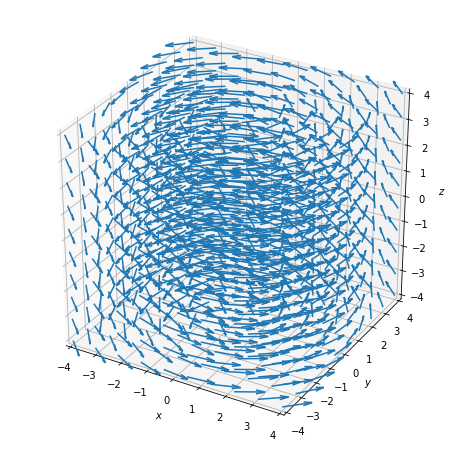

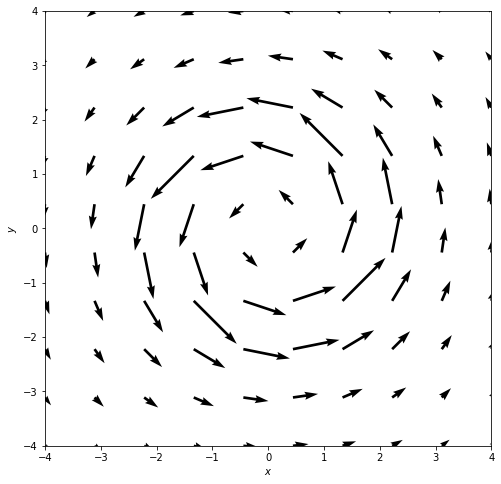

In [3]:
# Set up constants
mu_0 = 1.25663706 * 10**-6
omega = np.array((0, 0, 1))
R = 2 #meters
sigma = 1#C/m^

# Set up meshgrids
res = 10
lims = (-4, 4)
x = np.linspace(*lims, res)
y = np.linspace(*lims, res)
z = np.linspace(*lims, res)

# Rectangular meshes
X, Y, Z = np.meshgrid(x, y, z)

# Spherical meshes
r = np.sqrt(X**2 + Y**2 + Z**2)
theta = np.arccos(Z / r)
phi = np.arctan(Y / X)
phi[np.where(X < 0)] = phi[np.where(X < 0)] - np.pi

A = np.zeros((res, res, res, 3))

# Use result from Griffiths to find A at each point
for i in range(res):
    for j in range(res):
        for k in range(res):
            
            # Calculate phi unit vector to get vector directions
            #/
            phihat = np.array((-np.sin(phi[i, j, k]), np.cos(phi[i, j, k]), 0))
            #/
            # Make calculations for A[i, j, k, :] here
            #/
            if r[i, j, k] <= R:
                const = (mu_0 * R * np.linalg.norm(omega) * sigma / 
                        3 * r[i, j, k] * np.sin(theta[i, j, k]))
                A[i, j, k, :] = const  * phihat
                
            elif r[i, j, k] > R:
                const = ((mu_0 * R**4 * np.linalg.norm(omega) * sigma 
                         / 3) * (np.sin(theta[i, j, k]) /  r[i, j, k]**2))
                A[i, j, k, :] = phihat * const
            #/
            
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, A[:, :, :, 0], A[:, :, :, 1], A[:, :, :, 2], normalize=True) 
#The normalize keyword sets all vectors to the same length. Unfortunately, a 3-D quiver plot won't work without it.

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim(*lims)
ax.set_ylim(*lims)
ax.set_zlim(*lims)

plt.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111) #, projection='3d')
ax.quiver(X[:, :, int(res/2)], Y[:, :, int(res/2)], A[:, :, int(res/2), 0], A[:, :, int(res/2), 1])

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(*lims)
ax.set_ylim(*lims)

plt.show()

## Part b: Magnetic Field in a Rotating Solid Sphere

Now let's try working similar problem with a solid sphere of uniform charge density $\rho$ and radius $R$, rotating at a constant angular velocity $\boldsymbol\omega$. **For this, calculate and plot the vector potential *inside* of the sphere.**

To solve this, you'll need to integrate the equation for vector potential from part a (eq 5.69) over the entire sphere. Note that some of the volume in your integral will be for points outside of your radius of interest, whereas some of the volume will be within it. *Hint: $\rho = \sigma dr$*. 

Rather than do the integral by hand and feed that result into python, you can do that entirely computationally with the <code>scipy.integrate</code> package! In particular, you'll need to use [<code>sp.quad</code>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html), which is the standard definite integration method .

In particular, you'll need to use [<code>sp.quad</code>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html), which is the standard definite integration method .

Here's an example of usage for sp.quad that might help with writing your code. In this, we'll calculate $\int_{0}^{4} x^2 dx$.

In [3]:
def integrand(x):
    return x**2

a = sp.quad(integrand, 0, 4)
print("a is", a)


def integrand_y(y, z):
    return y*z

b = []
for z in range(3):
    b.append(sp.quad(integrand_y, 0, 2, args=(z))[0])
    
print("b is", b)

a is (10.666666666666668, 1.1842378929335004e-13)


There are a couple things to notice above. First, sp.quad takes three main arguments. The first is a function which acts as your integrand. The first argument in your integrand ($x$, in this case) is your integration variable. Any additional arguments can be fed in using the "args" keyword argument. This will be helpful for the following section, as you want to feed in the given $\theta$ and $|\textbf{r}|$ for each point on the grid.

You'll also notice that sp.quad returns two different values. The first is the value of the integral, and the second is an estimate of the absolute error of the result. For our purposes, you can just ignore this error value.

In the next cell, make your integrand functions. It may help you to write down your integral on paper so that you can see what your integrand needs to look like. Factoring constants out of the integral will make your code much easier to work with. The function signatures below are how I did it, but, as always, there are many different solutions.

In [4]:
#r_bar is radius in the integral
#th is theta at the point where you are calculating A
#r0 is the radius corresponding to the point where you are calculating A
def integrand_out(r_bar, th, r0): 
#/
    c = np.sin(th) * r0
    return c * r_bar
#/

def integrand_in(r_bar, th, r0):
#/
    c = np.sin(th) / r0**2
    return c * r_bar**4
#/

Now that you've made your integrands, you'll need to use them in sp.quad to calculate the integral. You can factor out the $\boldsymbol{\hat\phi}$, and use the equation in the back of Griffiths to calculate it as a vector in rectangular coordinates.

If you're unsure about your answer, you can also calculate the result by hand and plot that as well.

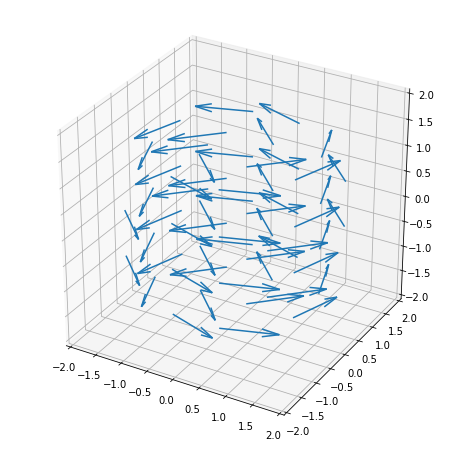

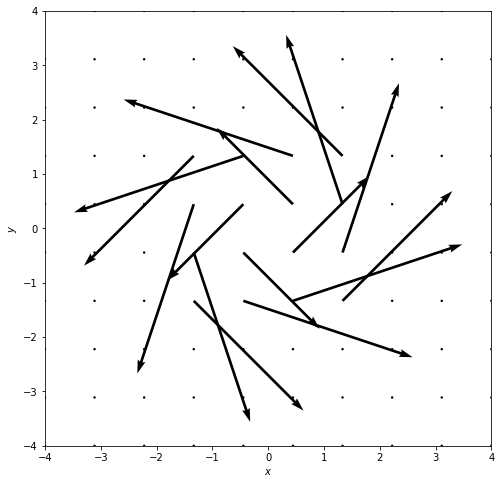

In [5]:
rho = 1


A = np.zeros((res, res, res, 3))

for i in range(res):
    for j in range(res):
        for k in range(res):
            # Make calculations inside of sphere
            if r[i, j, k] <= R:
#/
                const = 1/3 * mu_0 * np.linalg.norm(omega) * rho
                phihat = np.array((-np.sin(phi[i, j, k]), np.cos(phi[i, j, k]), 0))
                
                th = theta[i, j, k]
                r0 = r[i, j, k]
                A[i, j, k, :] = const * phihat * (
                                sp.quad(integrand_out, r[i, j, k], R, args=(th, r0))[0] + 
                                sp.quad(integrand_in, 0, r[i, j, k], args=(th, r0))[0])
#/

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, A[:, :, :, 0], A[:, :, :, 1], A[:, :, :, 2], normalize=True)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
plt.show()      

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111) #, projection='3d')
ax.quiver(X[:, :, int(res/2)], Y[:, :, int(res/2)], A[:, :, int(res/2), 0], A[:, :, int(res/2), 1])

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(*lims)
ax.set_ylim(*lims)

plt.show()

/Users/christenc/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:509: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


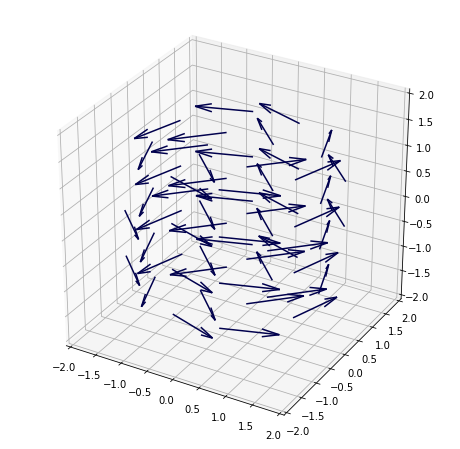

In [6]:
#/
def get_colors(bx, by, bz, c='viridis'):
    bxflat = bx.flatten()
    byflat = by.flatten()
    bzflat = bz.flatten()
    col = np.array([np.linalg.norm((bxflat[i], byflat[i], bzflat[i])) for i in range(len(bxflat))])

    minima = np.nanmin(col[np.nonzero(col)])
    maxima = np.nanmax(col)

    norm = colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=c)
    
    return [mapper.to_rgba(v) for v in col]

### ANALYTICAL CHECK
A = np.zeros((res, res, res, 3))

const = mu_0 * np.linalg.norm(omega) * rho
for i in range(res):
    for j in range(res):
        for k in range(res):
            if r[i, j, k] <= R:
                phihat = np.array((-np.sin(phi[i, j, k]), np.cos(phi[i, j, k]), 0))
                
                const = 1/2 * mu_0 * np.linalg.norm(omega) * rho
                A[i, j, k, :] = const * r[i, j ,k] * np.sin(theta[i, j, k]) * (
                                ((R**2) / 3 - (r[i, j, k]**2) / 5) *
                                phihat)
# THIS CODE IS ALL COMMENTED OUT AS IT's ACTUALLY THE B-FIELD
#    IT TOOK A WHILE TO MAKE THOUGH, SO I DIDN'T WANT TO DELETE IT
#                 rhat = np.array((np.sin(theta[i, j, k]) * np.cos(phi[i, j, k]),
#                                  np.sin(theta[i, j, k]) * np.sin(phi[i, j, k]),
#                                  np.cos(theta[i, j,  k])))
#                 thetahat = np.array((np.cos(theta[i, j, k]) * np.cos(phi[i, j, k]),
#                                      np.cos(theta[i, j, k]) * np.sin(phi[i, j, k]),
#                                      -np.sin(theta[i, j, k])))
                
#                 rhat_coeff = R**2 / 3 - r[i, j, k]**2 / 5
#                 thetahat_coeff = R**2 / 3 - 2 * r[i, j, k]**2 / 5
#                 A[i, j, k, :] = const * (rhat_coeff * np.cos(theta[i, j, k]) * rhat -
#                                         thetahat_coeff * np.sin(theta[i, j, k] * thetahat))
                
col = get_colors(A[:, :, :, 0], A[:, :, :, 1], A[:, :, :, 2], c='seismic')


col = [i for i in col if i != (0, 0, 0, 0)]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, A[:, :, :, 0], A[:, :, :, 1], A[:, :, :, 2], color=col, normalize=True)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
plt.show()     
#/